# Libraries

In [1]:
import numpy as np
from omegaconf import OmegaConf
import models
import loss_func
import train
import loader
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import optimizer_Factory as of
import Data.genData as genData

# Load Data

<Figure size 640x480 with 0 Axes>

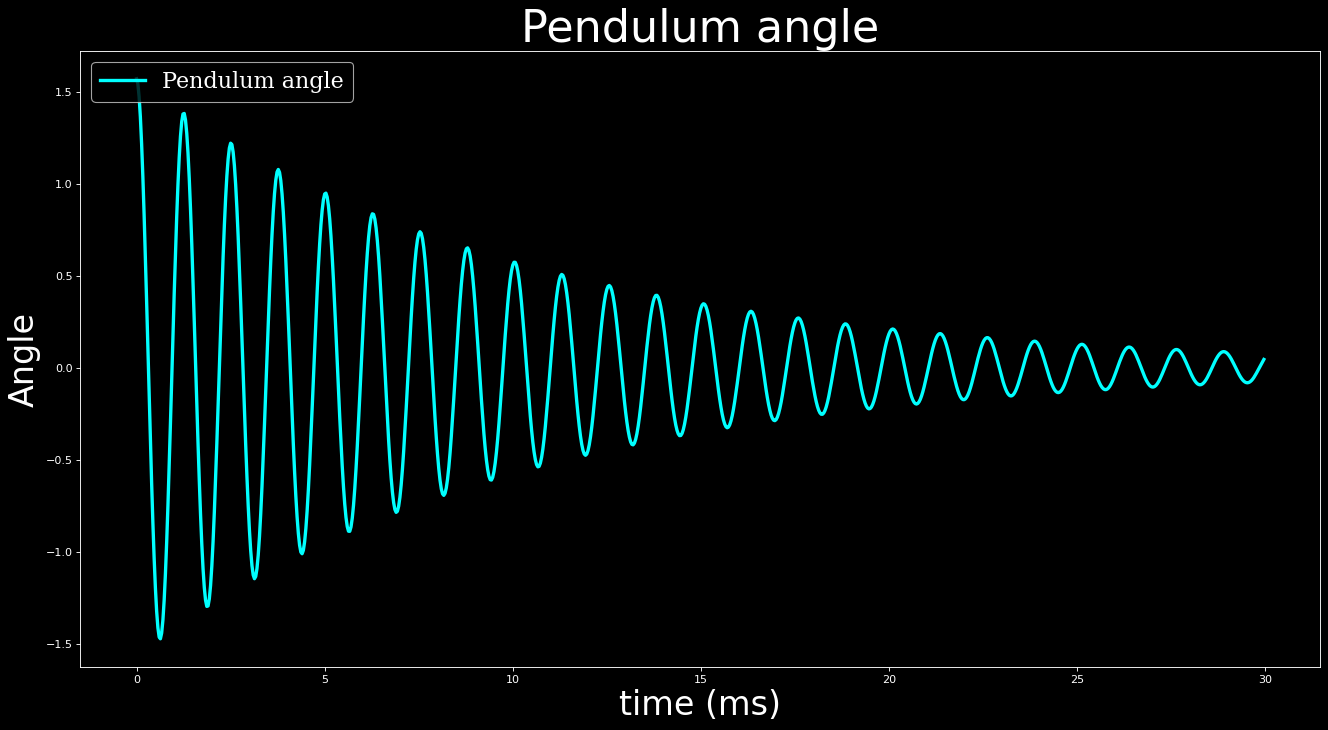

In [2]:
g=9.81
L=1
x0=np.pi/2
x1=np.pi/2.5
t,a = genData.generatePendulumA(g,L,x0, x1)

In [3]:
genData.create_pendulum_image(90)
genData.generateVideo()

In [4]:
np.sin(np.pi/2)

1.0

In [3]:
cfg = OmegaConf.load("config.yaml")
cmd_cfg = OmegaConf.from_cli()
cfg = OmegaConf.merge(cfg, cmd_cfg)
print(OmegaConf.to_yaml(cfg))

seed: 42
optimize:
  optimizer: Adam
  lr: 0.001
train:
  epochs: 100
  batch_size: 32
dataset:
  path: MNIST
  test_size: 0.2
  train_size: 0.6
  val_size: 0.2
  num_workers: 2
loss: MSE
--ip: 127.0.0.1
--stdin: 9008
--control: 9006
--hb: 9005
--Session:
  signature_scheme: hmac-sha256
  key: b"4c98b004-d535-4e73-94f8-222aa9c93bfb"
--shell: 9007
--transport: tcp
--iopub: 9009
--f: /home/alejandro/.local/share/jupyter/runtime/kernel-v2-70836UqBrJwP0iTB.json



In [4]:
timeseries_rand= np.random.rand(10, 1000)
print(timeseries_rand.shape)
#print(timeseries.shape)



(10, 1000)


In [5]:
window = 4
train_loader, val_loader, test_loader = loader.generateLoaders(timeseries, 'pearson', window = window, overlap = 0.5)

X_train shape:  (50, 300)
X_val shape:  (50, 100)
X_test shape:  (50, 100)


/home/alejandro/Documents/Repositories/NeuronsGraphConnectivity-1/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/alejandro/Documents/Repositories/NeuronsGraphConnectivity-1/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Using device: cpu
epoch: 10 	 training loss: 0.09032488614320755 	 validation loss: 0.11749691888689995 	 accuracy : 1.0
epoch: 20 	 training loss: 0.08376769125461578 	 validation loss: 0.12286796048283577 	 accuracy : 1.0
epoch: 30 	 training loss: 0.08225342780351638 	 validation loss: 0.12458773329854012 	 accuracy : 1.0
epoch: 40 	 training loss: 0.08402919322252274 	 validation loss: 0.12198932841420174 	 accuracy : 1.0
epoch: 50 	 training loss: 0.08125761300325393 	 validation loss: 0.12202628701925278 	 accuracy : 1.0
epoch: 60 	 training loss: 0.0826525941491127 	 validation loss: 0.12136842682957649 	 accuracy : 1.0
epoch: 70 	 training loss: 0.08159133940935134 	 validation loss: 0.11992194876074791 	 accuracy : 1.0
epoch: 80 	 training loss: 0.0818904921412468 	 validation loss: 0.11976766958832741 	 accuracy : 1.0
epoch: 90 	 training loss: 0.08396656811237335 	 validation loss: 0.12023437395691872 	 accuracy : 1.0
epoch: 100 	 training loss: 0.0811483696103096 	 validati

<Figure size 640x480 with 0 Axes>

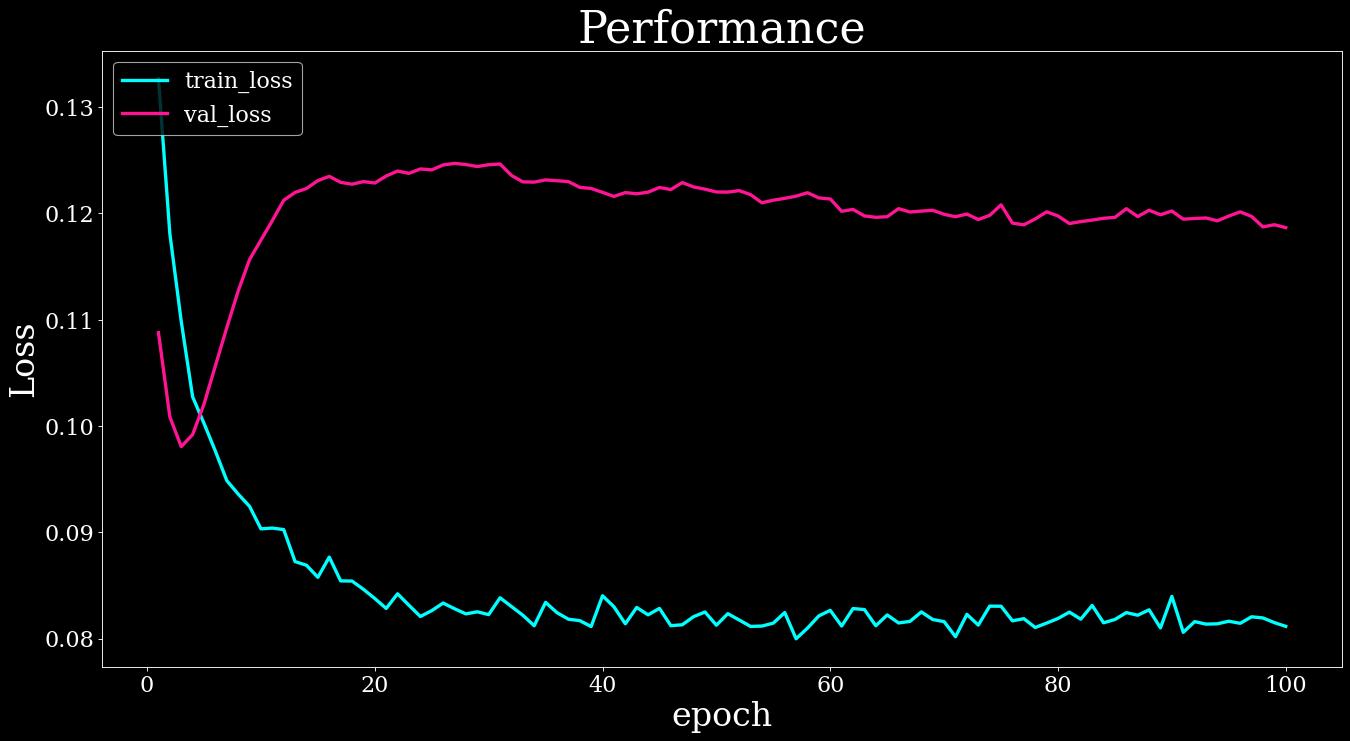

In [6]:

model = models.GNN(window, 1, 32)

model, train_losses, val_losses, accuracy_list  = train.train(model, train_loader, val_loader, 'GNNSimple')